# Model

https://sci-hub.se/https://shapeamerica.tandfonline.com/doi/abs/10.1080/02640414.2012.654397#.YJCUXS271QI


The laws of motion can be derived through the energy conservation law.

$P_{in} = f(X)$



Specifically, we have the following dissipative factors:

$P_r = mgR \cdot v$ (Rolling resistance)

$P_w = A(v-w \cos{\phi})^2 \cdot v$ (Drag resistance)

$P_e = \epsilon P_{in}$ (Efficiency loss)

$P_g = mg \sin{\theta} \cdot v$ (Gravity work)

$P_{out} = P_g + P_r + P_w + P_e$

$K = \frac{mv^2}{2}$

$\frac{dK}{dt} = P_{in} - P_{out}$

In [1]:
from cadCAD_tools import easy_run
import plotly.express as px
import numpy as np
from math import degrees, radians
from random import random

In [2]:
initial_state = {
    'position': 0.0, # m
    'speed': 0.0, # m/s
    'energy': 0.0, # J
    'wind_speed': 0.0, # m/s
    'wind_angle': 0.0, # rad
    'incline': radians(-5) # rad
}

params = {
    'gravity': 9.81, # m/s^2
    'rolling_resistance': 0.005, # 
    'wind_resistance': 0.25, # m^2, Also know as CdA 
    'mass': 65, # kg
    'dt': 0.1 # Seconds
}

params = {k: [v] for k, v in params.items()}



def p_rolling_resistance(params, _2, _3, state):
    m = params['mass']
    g = params['gravity']
    R = params['rolling_resistance']
    v = state['speed']
    
    power = -1 * m * g * R * v
    return {'power': power}
    

def p_wind_resistance(params, _2, _3, state):
    A = params['wind_resistance']
    w = state['wind_speed']
    phi = state['wind_angle']
    v = state['speed']
    
    power = -1 * v * A * (v - w * np.cos(phi)) ** 2
    return {'power': power}


def p_gravity(params, _2, _3, state):
    m = params['mass']
    g = params['gravity']
    theta = state['incline']
    v = state['speed']
    
    power = -1 * m * g * v * np.sin(theta)  
    return {'power': power}
    
    
def p_power_output(params, _2, _3, state):
    v = state['speed']
    theta = state['incline']
    
    speed_in_km_h = v * 3.6 
    gradient = degrees(theta)
    
    if gradient > 2.0:
        output = 170
    elif gradient > 0.5:
        output = 140
    elif gradient > -0.5:
        output = 90
    elif gradient < -2.0:
        output = 30
    elif gradient < -4.0:
        output = 0
    else:
        output = 50 * (v + 4) # This is going to be negative
             
    if output > 0:
        if speed_in_km_h > 40:
            output = -1 * 5 * (speed_in_km_h - 40)
        else:
            pass
    else:
        pass
    
    return {'power': output}

def s_integrate_energy(params, _2, _3, state, p_i):
    energy_change = p_i['power'] * params['dt']
    new_energy = state['energy'] + energy_change
    return ('energy', new_energy)


def s_position(params, _2, _3, state, _5):
    dt = params['dt']
    x = state['position']
    v = state['speed']
    new_x = x + v * dt
    return ('position', new_x)

def s_speed(params, _2, _3, state, _5):
    m = params['mass']
    E = state['energy']
    v = np.sqrt(2 * E / m)
    return ('speed', v)


def s_seconds(params, _2, _3, state, _5):
    seconds_per_t = params['dt']
    t = state['timestep']
    seconds = seconds_per_t * t
    return ('seconds_passed', seconds)


def s_incline(_1, _2, _3, _4, _5):
    scale = 2
    random_value = (random() - 0.5) * scale # between -1 and +1
    value = radians(random_value)
    return ('incline', value)
    

def s_wind_speed(_1, _2, _3, _4, _5):
    scale = 6
    random_value = (random() - 0.5) * scale # between -3 and +3
    value = random_value
    return ('wind_speed', value)


def s_wind_angle(_1, _2, _3, _4, _5):
    scale = 360
    random_value = (random() - 0.5) * scale # between -180 and +180
    value = radians(random_value)
    return ('wind_angle', value)
    
    
timestep_block = [
    {
        'label': 'Time',
        'policies': {
            
        },
        'variables': {
            'seconds_passed': s_seconds
        }
    },
    {
        'label': 'Environment',
        'policies': {
            
        },
        'variables': {
            'incline': s_incline,
            'wind_speed': s_wind_speed,
            'wind_angle': s_wind_angle
        }
    },
    {
        'label': 'Energy',
        'policies': {
            'rolling_resistance': p_rolling_resistance,
            'wind_resistance': p_wind_resistance,
            'gravity': p_gravity,
            'output_power': p_power_output 
            
        },
        'variables': {
            'energy': s_integrate_energy
        }
        
    },
    {
        'label': 'Motion',
        'policies': {

        },
        'variables': {
            'position': s_position,
            'speed': s_speed
        }
    }
]

results = easy_run(initial_state, 
                   params,
                   timestep_block,
                   1000,
                   10)


                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (1000, 5, 10, 6)
Execution Method: local_simulations
SimIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
SubsetIDs: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Ns       : [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
ExpIDs   : [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Execution Mode: parallelized
Total execution time: 0.77s
{'gravity': 9.81, 'rolling_resistance': 0.005, 'wind_resistance': 0.25, 'mass': 65, 'dt': 0.1}


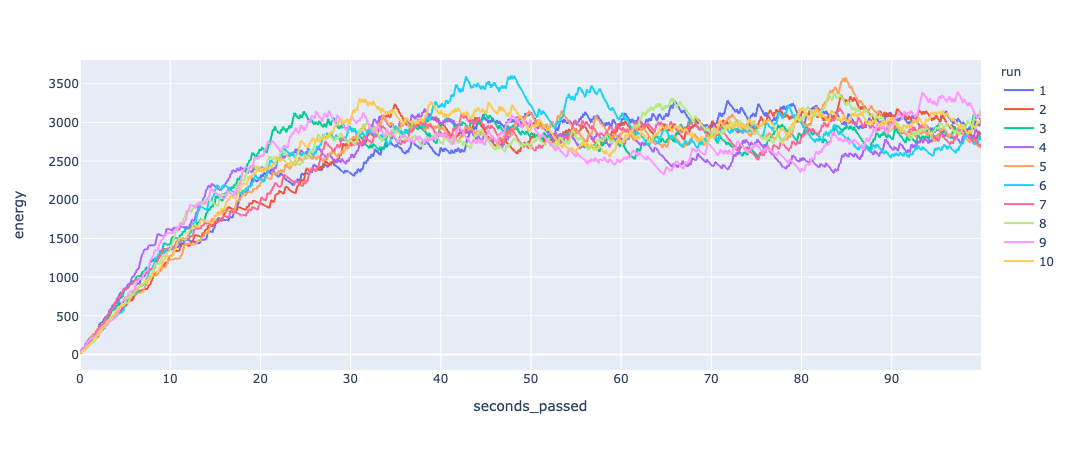

In [3]:
px.line(results,
        x='seconds_passed',
        y='energy',
        color='run')

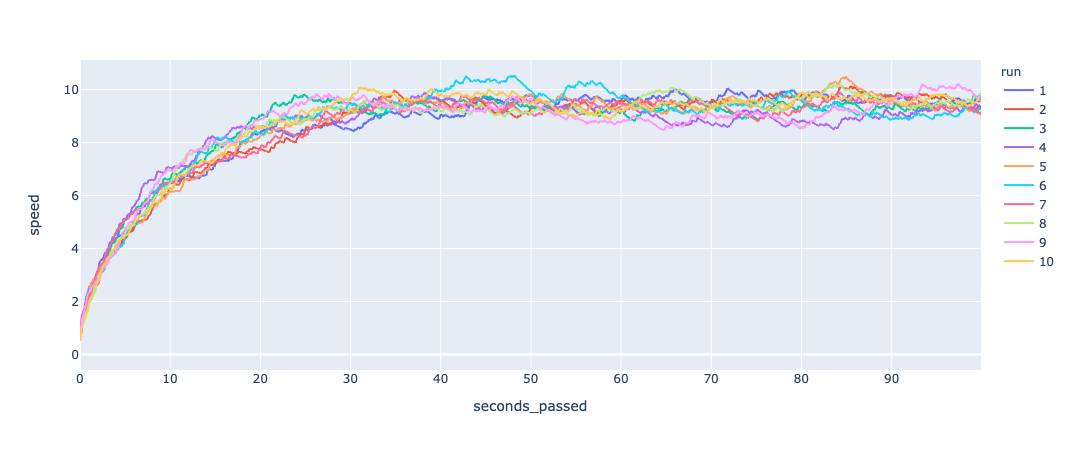

In [4]:
px.line(results,
        x='seconds_passed',
        y='speed',
        color='run')

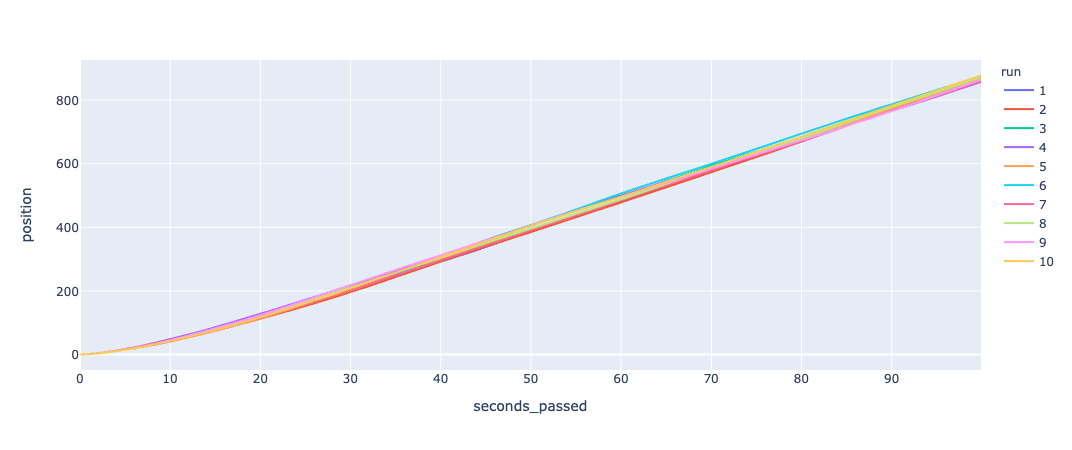

In [5]:
px.line(results,
        x='seconds_passed',
        y='position',
        color='run')

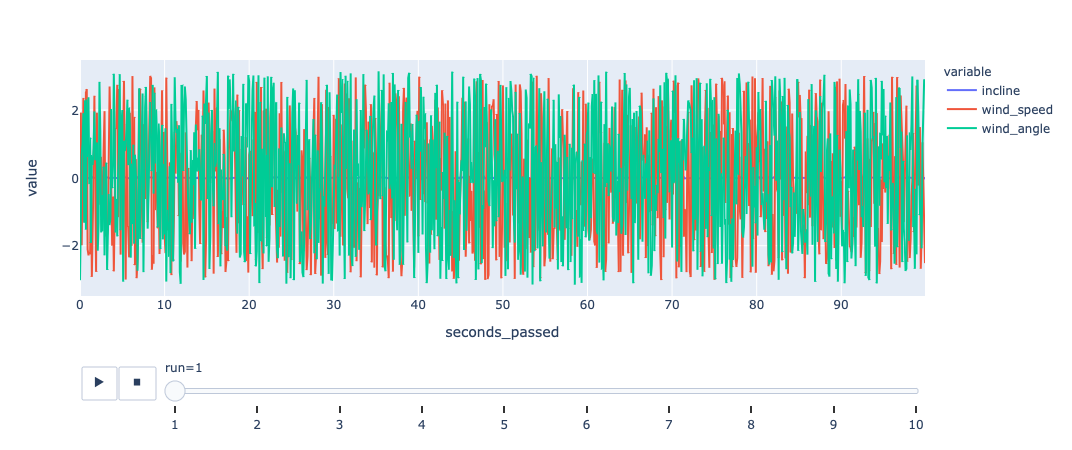

In [6]:
px.line(results,
        x='seconds_passed',
        y=['incline', 'wind_speed', 'wind_angle'],
        animation_frame='run')

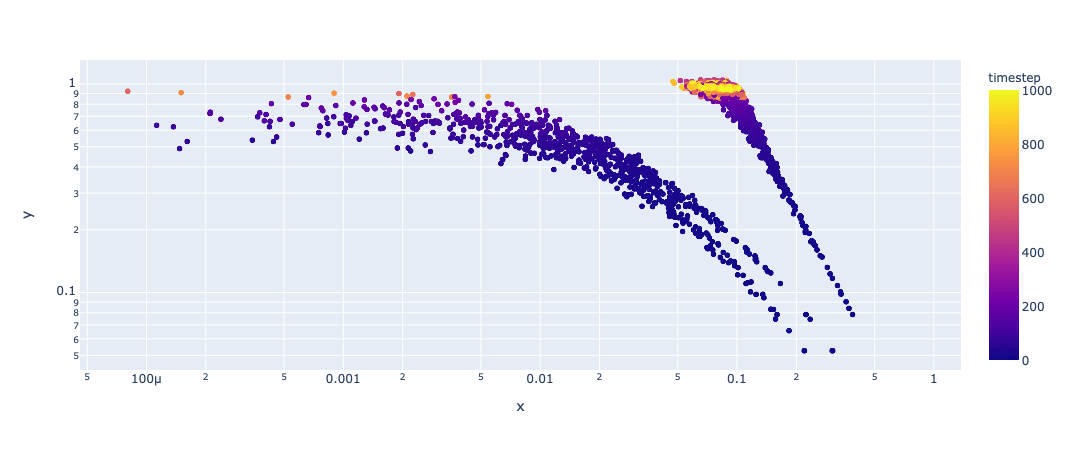

In [7]:
fig_df = results
px.scatter(fig_df,
           x=fig_df.speed.diff(),
           y=fig_df.position.diff(),
           color='timestep',
           log_x=True,
           log_y=True)

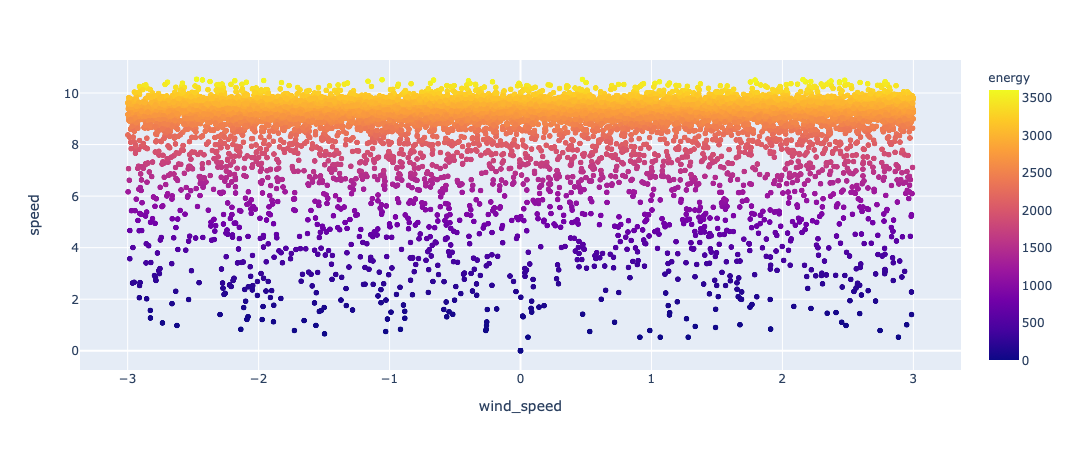

In [8]:
fig_df = results
px.scatter(fig_df,
           x=fig_df.wind_speed,
           y=fig_df.speed,
           color='energy')